In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
for i in range(256):
    pattern = np.ones(shape=(720,720,1))
    pattern[:,:] = i # 0 부터 255
    cv2.imwrite(f'./patterns/pattern_{i}.png', pattern)
    

In [3]:
pattern = np.ones(shape=(720,720,1))
pattern[:,:] = 255

In [4]:
cv2.imwrite('./patterns/pattern.png', pattern)

True

In [5]:
# for i in range(256):

#     print(f'"patterns/pattern_{i}.png",')

In [6]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
img_path = './experiments/test_2022_11_16_09_23/calibration0/'

N = 256 # number of projector intensities
M = 1 # number of repeatition for each projector intensity
roi = [917, 1017, 1100, 1200]  # rmin, rmax, cmin, cmax
#exp = [1]
intensity = np.zeros((N,3))


for i in range(N):
    for j in range(M):
        im = cv2.imread(os.path.join(img_path,'pattern_%04d_capture_%04d.png' %(i, i+1)), -1).astype(np.float64)
        im /= 65535.0
        im = im[roi[0]:roi[1], roi[2]:roi[3], :]
        if j == 0:
            im_i = im/M
        else:
            im_i += im/M
     
    im_i_mean = im_i.mean(axis=(0,1))
    intensity[i,:] = im_i_mean
        

In [8]:
x_linear = np.linspace(0,255,256)
y_linear = np.linspace(0,255,256)

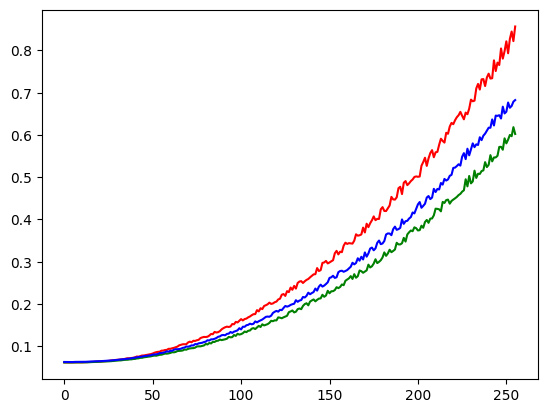

In [9]:
plt.plot(intensity[:,0], 'r')
plt.plot(intensity[:,1], 'g')
plt.plot(intensity[:,2], 'b')

In [10]:
import scipy.io

In [11]:
r_dic = {"r_x":x_linear, "r_y":intensity[:,0]}
g_dic = {"g_x":x_linear, "g_y":intensity[:,1]}
b_dic = {"b_x":x_linear, "b_y":intensity[:,2]}

In [12]:
scipy.io.savemat("./r_curve.mat",r_dic)
scipy.io.savemat("./g_curve.mat",g_dic)
scipy.io.savemat("./b_curve.mat",b_dic)

In [13]:
rgb_fit = scipy.io.loadmat("./rgb_fit.mat")

In [14]:
rgb_fit = rgb_fit['p']

In [15]:
r_a,r_b,r_c = rgb_fit[0,0],rgb_fit[0,1],rgb_fit[0,2]
g_a,g_b,g_c = rgb_fit[0,3],rgb_fit[0,4],rgb_fit[0,5]
b_a,b_b,b_c = rgb_fit[0,6],rgb_fit[0,7],rgb_fit[0,8]

In [16]:
r_y = r_a*(y_linear**r_b)+r_c
g_y = g_a*(y_linear**g_b)+g_c
b_y = b_a*(y_linear**b_b)+b_c

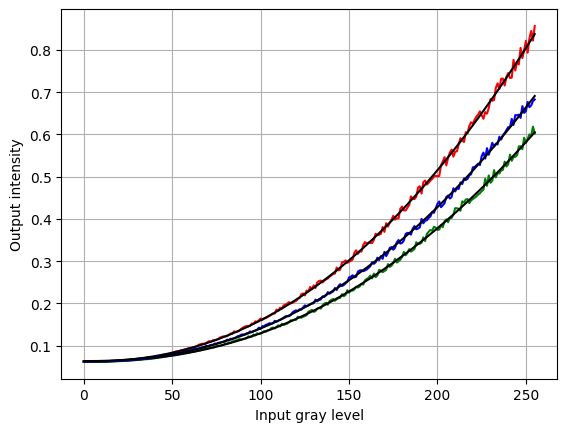

In [17]:
plt.plot(intensity[:,0],'r'),plt.plot(x_linear,r_y,'black')
plt.plot(intensity[:,1],'g'),plt.plot(x_linear,g_y,'black')
plt.plot(intensity[:,2],'b'),plt.plot(x_linear,b_y,'black')
plt.xlabel('Input gray level')
plt.ylabel('Output intensity')
plt.grid()
# plt.show()
plt.savefig('./gamma_correction.svg')

In [18]:
# # random rgb colors

# import random 

# R = 100 # repetition
# rgb_array = np.zeros(shape=(R,3))
# for i in range(R):
#     r, g, b = random.randint(0,255), random.randint(0,255), random.randint(0,255)
#     rgb_array[i,:] = r,g,b
#     patt = np.zeros(shape = (720,720,3))
#     patt[:,:,0],patt[:,:,1],patt[:,:,2] = r,g,b
#     patt = np.asarray(patt, dtype=np.uint8)

#     cv2.imwrite(f'./patterns/rgb_pattern/rgb_{i}.png', cv2.cvtColor(patt, cv2.COLOR_RGB2BGR))